In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator


np.random.seed(1)
tf.random.set_seed(1)

## Load Dataset

In [2]:
# hyperparameters to play with

image_width, image_height = 64, 64
input_shape = (image_width, image_height, 3)
batch_size = 32 # default batch size in keras


train_datagen = ImageDataGenerator(rescale = 1./255, 
                                   shear_range = 0.2, 
                                   zoom_range = 0.2, 
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/training_set', 
                                                 target_size = (image_width, image_height), 
                                                 batch_size = batch_size, 
                                                 class_mode = 'binary')


test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test_set', 
                                            target_size = (image_width, image_height), 
                                            batch_size = batch_size,
                                            shuffle=False, # this should ideally be True, but when generating confusion matrix, it was set to False
                                            class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [3]:
# print(training_set)
# print(dir(training_set))
# print(test_datagen)
# print(dir(test_datagen))
print(training_set.class_indices)
print(training_set.num_classes)
print(training_set.classes)
print(len(test_set.classes))

{'cats': 0, 'dogs': 1}
2
[0 0 0 ... 1 1 1]
2000


## Build Model

In [4]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation=tf.nn.relu, input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(units=256, activation=tf.nn.relu),
    tf.keras.layers.Dropout(rate=0.5),
    
    tf.keras.layers.Dense(units=256, activation=tf.nn.relu),
    tf.keras.layers.Dropout(rate=0.5),
    
    tf.keras.layers.Dense(units=1, activation=tf.nn.sigmoid), # output layer
])

## Compile and Fit model

In [5]:
# hyperparameters to play with

epochs = 50
learning_rate=0.001
opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(
    optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"]
)


model.fit(training_set, epochs=epochs, validation_data=test_set)


# save the model history to file
import json

model_dict = model.history.history

with open('model_dict_hist.json', 'w') as f:
    json.dump(model_dict, f)

Epoch 1/50
250/250 [==============================] - 17s 69ms/step - loss: 0.6922 - accuracy: 0.5240 - val_loss: 0.6801 - val_accuracy: 0.5695
Epoch 2/50
250/250 [==============================] - 16s 66ms/step - loss: 0.6794 - accuracy: 0.5629 - val_loss: 0.6678 - val_accuracy: 0.6075
Epoch 3/50
250/250 [==============================] - 17s 66ms/step - loss: 0.6535 - accuracy: 0.6290 - val_loss: 0.6424 - val_accuracy: 0.6250
Epoch 4/50
250/250 [==============================] - 17s 66ms/step - loss: 0.6134 - accuracy: 0.6714 - val_loss: 0.5954 - val_accuracy: 0.6895
Epoch 5/50
250/250 [==============================] - 18s 71ms/step - loss: 0.5893 - accuracy: 0.6941 - val_loss: 0.5822 - val_accuracy: 0.6930
Epoch 6/50
250/250 [==============================] - 18s 71ms/step - loss: 0.5509 - accuracy: 0.7199 - val_loss: 0.5218 - val_accuracy: 0.7585
Epoch 7/50
250/250 [==============================] - 19s 74ms/step - loss: 0.5265 - accuracy: 0.7386 - val_loss: 0.5554 - val_accuracy:

## Plot loss and Accuracy charts

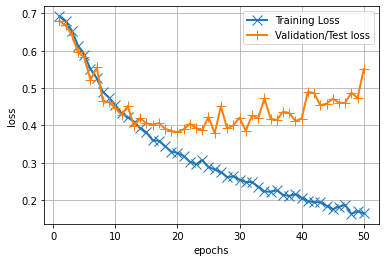

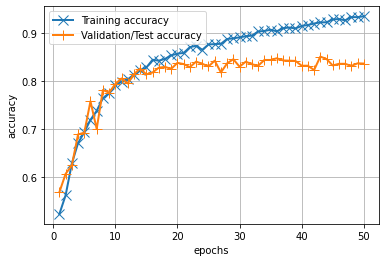

In [6]:
with open('model_dict_hist.json', 'r') as f:
    model_dict = json.load(f)

loss_values = model_dict['loss']
val_loss_values = model_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

training_loss_line = plt.plot(epochs, loss_values, label='Training Loss')
val_loss_line = plt.plot(epochs, val_loss_values, label='Validation/Test loss')
plt.setp(val_loss_line, linewidth=2.0, marker='+', markersize=10.0)
plt.setp(training_loss_line, linewidth=2.0, marker='x', markersize=10.0)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid(True)
plt.legend()
plt.show()



loss_values = model_dict['accuracy']
val_loss_values = model_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)

training_acc_line = plt.plot(epochs, loss_values, label='Training accuracy')
val_acc_line = plt.plot(epochs, val_loss_values, label='Validation/Test accuracy')
plt.setp(val_acc_line, linewidth=2.0, marker='+', markersize=10.0)
plt.setp(training_acc_line, linewidth=2.0, marker='x', markersize=10.0)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid(True)
plt.legend()
plt.show()


## Model Summary

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 256)         2

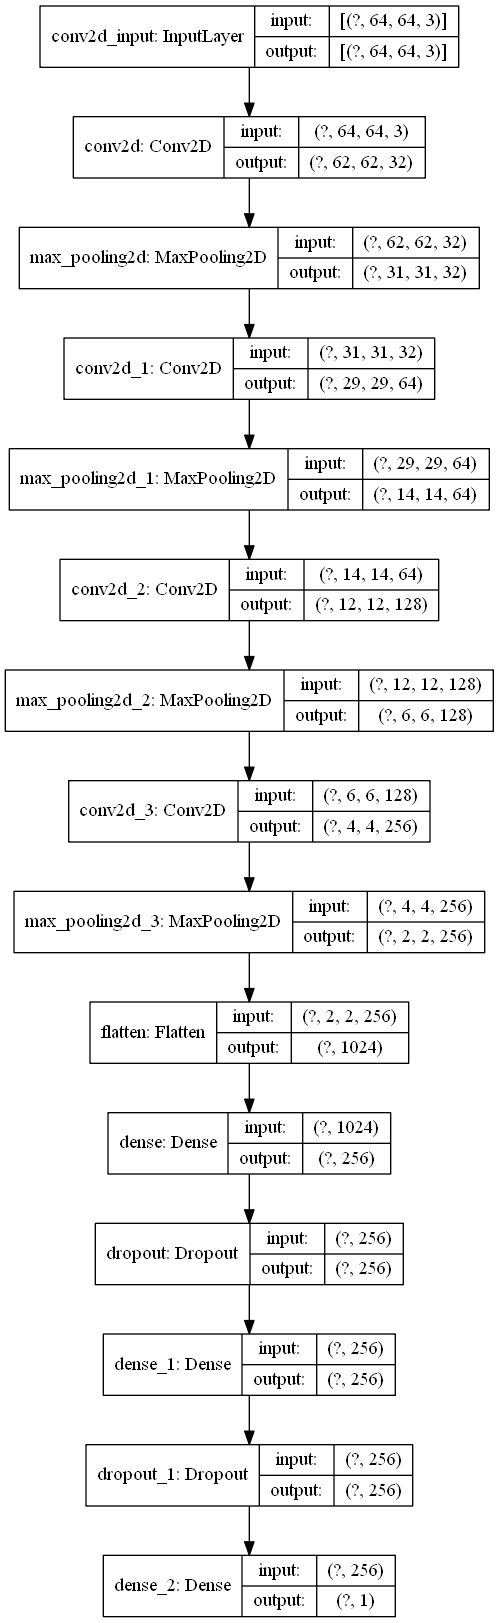

In [7]:
model.summary()
tf.keras.utils.plot_model(
    model, to_file='model_conv.png', show_shapes=True, show_layer_names=True,
)

In [8]:
val_loss, val_accuracy = model.evaluate(test_set)
print(val_loss, val_accuracy)

63/63 [==============================] - 2s 32ms/step - loss: 0.5508 - accuracy: 0.8370
0.5507614016532898 0.8370000123977661


In [9]:
model.save('cat_dog_classifier_model.h5')

In [10]:
saved_model = tf.keras.models.load_model('cat_dog_classifier_model.h5')

## Make predictions

[[1.]]
{'cats': 0, 'dogs': 1}
dog


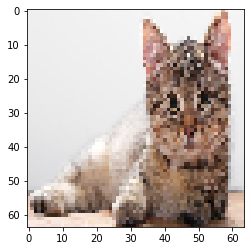

In [11]:
from keras.preprocessing import image
image_path = "dataset/single_prediction/cat_or_dog_2.jpg"
# image_path = "dataset/test_set/cats/cat.4004.jpg"
test_image = image.load_img(image_path, target_size = (64, 64))
plt.imshow(test_image)

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = saved_model.predict(test_image)
print(result)
print(training_set.class_indices)
if result[0][0] > 0.5:
  prediction = 'dog'
else:
  prediction = 'cat'

print(prediction)

predicted classes  [[1]
 [1]
 [0]
 ...
 [0]
 [0]
 [1]] 2000
test_classes [0 0 0 ... 1 1 1] 2000 {'cats': 0, 'dogs': 1}
[[782 218]
 [108 892]]
              precision    recall  f1-score   support

        cats       0.88      0.78      0.83      1000
        dogs       0.80      0.89      0.85      1000

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000



<AxesSubplot:>

<Figure size 720x504 with 0 Axes>

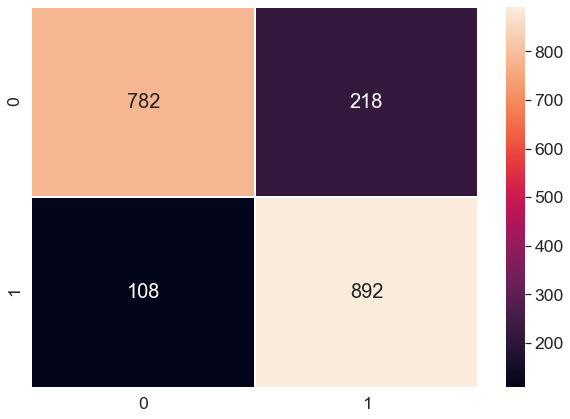

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
plt.figure(figsize = (10,7))


predictions = saved_model.predict(test_set)
# predicted_classes = np.argmax(predictions, axis=1)
predicted_classes = np.where(predictions > 0.5, 1, 0)
# print(list(predictions))
print('predicted classes ', predicted_classes, len(predicted_classes))

test_classes = test_set.classes
print('test_classes', test_classes, len(test_classes), test_set.class_indices)
confusion_mat = confusion_matrix(test_classes, predicted_classes, labels=[0, 1])
print(confusion_mat)

class_labels = list(test_set.class_indices.keys())
report = classification_report(test_classes, predicted_classes, target_names=class_labels)
print(report)

sns.set(font_scale=1.6) # for label size
plt.figure(figsize = (10,7))
sns.heatmap(confusion_mat, annot=True, fmt='g', annot_kws={"size": 20}, linewidths=0.5)


In [13]:
print(saved_model.predict(test_set))

[[0.92283946]
 [0.994365  ]
 [0.00110099]
 ...
 [0.03968683]
 [0.04075272]
 [0.99999666]]


In [14]:
a = [[1,2,3],[4,5,6]]
np.argmax(a, axis=0)

array([1, 1, 1], dtype=int64)